# 2nd Structured Project Based on Regression

# Predicting the sale Price of Bulldozers Based Machine Learning Model

## 1.Problem Definition
 To Predict the Future Sale Price of the BullDozers With given Characteristics and Features How much Price it sales By the Previous Examples

## 2.Data
This Data is came from the Kaggle Blue Book Builders
Competition:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this     set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1,     2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluations
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

for more the Competition link:https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4.Features
Kaggle Provides the All Data Dictionary detailling the all features of the data Set That you can see the Google Sheets

In [35]:
import pandas as pd
import numpy as n
import sklearn
import matplotlib.pyplot as plt

In [36]:
# Import and Train and Split the Data
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False)

In [37]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

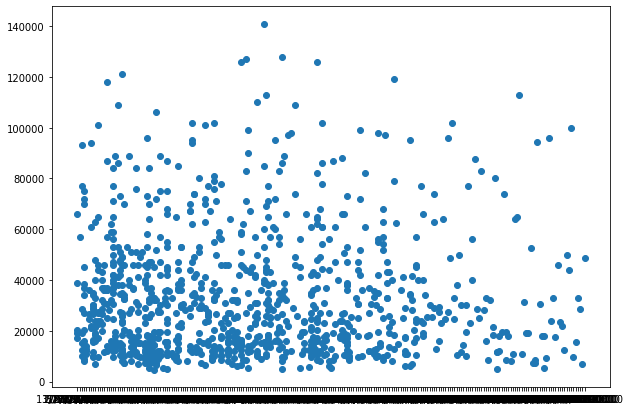

In [38]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [39]:
df.saledate.head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

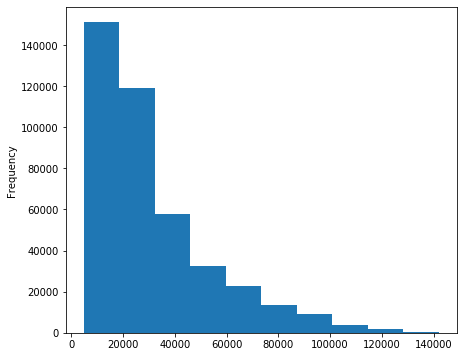

In [40]:
df.SalePrice.plot.hist(figsize=(7,6))

In [41]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Pasing Dates
When we work with the time series data we want to enrich that component as mmuch as possible.

We can do that by telling the Pandas which of our columns  has date in it using `parse date` Parameter

In [42]:
# import and Train and Split the Data
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [43]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [44]:
df.saledate.dtype

dtype('<M8[ns]')

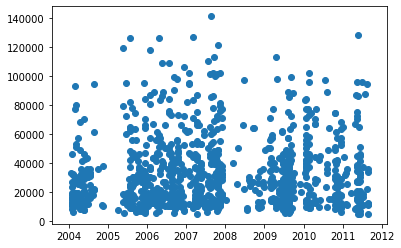

In [45]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [46]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Sort Data Frame Based on saledate
when Sort it is a good idea to sort based on the date

In [48]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [49]:
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [50]:
df_temp=df.copy()

In [51]:
df_temp.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

###  ADD  DATE TIME PARAMETER IN THE `saledate` COLUMN

In [52]:
df_temp["SaleYear"]=df_temp.saledate.dt.year
df_temp["SaleMonth"]=df_temp.saledate.dt.month
df_temp["SaleDay"]=df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"]=df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"]=df_temp.saledate.dt.dayofyear


In [53]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [54]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [55]:
# Now We Enriched our data in date time so remove saledate 
df_temp.drop("saledate",axis=1,inplace=True)

In [56]:
#Check the Values of Different Columns
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5.MODELLING 
Lets start some EDA (we should always do some model driven EDA)

In [57]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [58]:
len(df_temp)

412698

In [59]:
x

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1646770,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,1915521,5266,149,99.0,2001,NaN,NaN,D38E,D38,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,1919104,19330,149,99.0,2004,NaN,NaN,2064,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,1918416,17244,149,99.0,2004,NaN,NaN,337G,337,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,509560,3357,149,99.0,1993,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [60]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [61]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

 converting the letters into numbers
## Converting Strings  into Categories

https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.api.types.is_object_dtype.html

In [62]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [63]:
#find columns are string

In [64]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [66]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [67]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [68]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [69]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [70]:
df_temp.to_csv("Data/Bull_dozers_train_temp.csv",index=False)

In [71]:
df_temp=pd.read_csv("Data/Bull_dozers_train_temp.csv",low_memory=False)

In [72]:
df_temp.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,...,35000,7500,13000,53000,39000,16000,6000,16000,55000,34000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F,...,544H,317,S175,WA320,710VHP,D38E,2064,337G,12G,544H


## Filling the Missing values

### Filling the Missing Numerics

In [73]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [74]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [75]:
# check  for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
    

auctioneerID
MachineHoursCurrentMeter


In [76]:
#Fill the missing values with the median:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"is_missing"]=pd.isnull(content)
            df_temp[label]=content.fillna(content.median())

In [77]:
len(df_temp)

412698

In [78]:
# check  for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [79]:
df_temp.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [80]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [81]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [141]:
# FIll the Categorical to codes 
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"is_missing"]=pd.isnull(content)
            df_temp[label]=pd.Categorical(content).codes+1
            

In [142]:
pd.Categorical(df_temp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [143]:
pd.Categorical(df_temp["UsageBand"]).codes+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [146]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 97 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SalesID                             412698 non-null  int64  
 1   SalePrice                           412698 non-null  float64
 2   MachineID                           412698 non-null  int64  
 3   ModelID                             412698 non-null  int64  
 4   datasource                          412698 non-null  int64  
 5   auctioneerID                        412698 non-null  float64
 6   YearMade                            412698 non-null  int64  
 7   MachineHoursCurrentMeter            412698 non-null  float64
 8   UsageBand                           412698 non-null  int8   
 9   fiModelDesc                         412698 non-null  int16  
 10  fiBaseModel                         412698 non-null  int16  
 11  fiSecondaryDesc           

In [86]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 97, dtype: int64

Now all the is numeric as well no missing data so we able to build our machine Learning model

In [145]:
# check  for which columns have string values
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label]=pd.Categorical(content).codes+1
        

In [88]:
%%time 
# Instansiate the model
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

Wall time: 10min 20s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [89]:
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875446287048968

#### Splitting the  data into the valid and Train 

In [90]:
df_valid=df_temp[df_temp["SaleYear"]==2012]
df_train=df_temp[df_temp["SaleYear"]!=2012]

In [91]:
len(df_valid),len(df_train)

(11573, 401125)

In [92]:
X_train,Y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]

In [93]:
X_valid,Y_valid=df_valid.drop("SalePrice",axis=1),df_valid["SalePrice"]

In [94]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [95]:
Y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [96]:
X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape

((401125, 96), (401125,), (11573, 96), (11573,))

In [97]:
# Create Evalution Function(in Competition Uses Root mean Squared log Error)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_Test,y_preds):
    '''This have the Y_test is the true Values and Y_preds'''
    '''this calcultes Root Mean Squared Log Error'''
    return n.sqrt(mean_squared_log_error(y_Test,y_preds))

In [98]:
#Create the Function to Evaluate the two Data
def show(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    score={"Train MAE":mean_absolute_error(Y_train,train_preds),
          "Valid MAE":mean_absolute_error(Y_valid,valid_preds),
          "Traing RMSLE":rmsle(Y_train,train_preds),
          "Valid RMLSLE":rmsle(Y_valid,valid_preds),
          "Train R^2 Score ":r2_score(Y_train,train_preds),
          "Valid R^2 Score":r2_score(Y_valid,valid_preds)}
    return(score)

In [99]:
%%time
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(X_train,Y_train)

Wall time: 53.4 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [100]:
show(model)

{'Train MAE': 5561.513057924589,
 'Valid MAE': 7155.632784930442,
 'Traing RMSLE': 0.2578005599357549,
 'Valid RMLSLE': 0.29223097494391737,
 'Train R^2 Score ': 0.860722898583499,
 'Valid R^2 Score': 0.832588403039663}

In [101]:
%%time
from sklearn.model_selection import RandomizedSearchCV
RF_grid={"n_estimators":n.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":n.arange(2,20,2),
        "min_samples_leaf":n.arange(1,20,1),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions=RF_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.4min finished


Wall time: 14min 40s
Parser   : 386 ms


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [102]:
%%time
# Most ideal Hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None)
ideal_model.fit(X_train,Y_train)

Wall time: 1min 57s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
show(ideal_model)

{'Train MAE': 2954.5926911916636,
 'Valid MAE': 5954.484981474969,
 'Traing RMSLE': 0.14467181070484203,
 'Valid RMLSLE': 0.2462841851682963,
 'Train R^2 Score ': 0.95886259298204,
 'Valid R^2 Score': 0.8816926060706244}

In [104]:
show(rs_model)

{'Train MAE': 6111.037154660391,
 'Valid MAE': 7685.846232510274,
 'Traing RMSLE': 0.27755507753190556,
 'Valid RMLSLE': 0.30694494693778634,
 'Train R^2 Score ': 0.8302991299943856,
 'Valid R^2 Score': 0.7996435887441076}

## Make Predicitons on Test Data

In [129]:
def pre(df_test):
    '''This Function gives the all Tested data  in preprocessed one'''
    #df_test.sort_values(by=["saledate"],inplace=True,ascending=True)
    df_test["SaleYear"]=df_test.saledate.dt.year
    df_test["SaleMonth"]=df_test.saledate.dt.month
    df_test["SaleDay"]=df_test.saledate.dt.day
    df_test["SaleDayOfWeek"]=df_test.saledate.dt.dayofweek
    df_test["SaleDayOfYear"]=df_test.saledate.dt.dayofyear
    df_test.drop("saledate",axis=1,inplace=True)
    #this gives the String one
    for label,content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[label]=content.astype("category").cat.as_ordered()
    #Fill the missing values with the median:
    for label,content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+"is_missing"]=pd.isnull(content)
                df_test[label]=content.fillna(content.median())
    # FIll the Categorical to codes 
    for label,content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+"is_missing"]=pd.isnull(content)
                df_test[label]=pd.Categorical(content).codes+1
            df_test[label]=pd.Categorical(content).codes+1
    return df_test

In [130]:
Df_test=pd.read_csv("Data/Test.csv",
                    low_memory=False,
                    parse_dates=["saledate"])

In [131]:
Df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [133]:
DF_test=pre(Df_test)

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [127]:
DF_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [136]:
set(X_train)-set(DF_test)

{'auctioneerIDis_missing'}

In [137]:
DF_test["auctioneerIDis_missing"]=False

Final Test DataFrame is Equala as test Data Frame

In [139]:
test_preds=ideal_model.predict(DF_test)

In [140]:
test_preds


array([22375.92616685, 17971.01044509, 53593.2462165 , ...,
       17583.00206587, 27702.79878655, 35464.25401782])

In [149]:
#format DataFrame Prediciton after into same Kaggle dataframe\
df_preds=pd.DataFrame({"SalesID":DF_test["SalesID"],"Predcition_of_salePrerice":test_preds})

In [152]:
df_preds.to_csv("Predictied data.csv")

# Feature Importance 

which Feature mostly influenced in the data

In [155]:
ideal_model.feature_importances_

array([3.15276283e-02, 2.46011790e-02, 4.56011976e-02, 2.07141581e-03,
       3.32520953e-03, 1.92259789e-01, 3.06991289e-03, 1.00129747e-03,
       4.17956098e-02, 5.36747061e-02, 6.65436051e-02, 4.78464140e-03,
       1.60532875e-02, 1.57557989e-01, 4.57388653e-02, 6.04745054e-03,
       3.35645444e-03, 2.20437783e-03, 4.37147616e-03, 6.30997380e-02,
       6.89430586e-04, 4.54278239e-04, 1.52810364e-03, 1.33186946e-04,
       1.43688301e-03, 2.46769499e-05, 9.31941257e-04, 1.26146253e-02,
       2.40600333e-04, 8.00961855e-03, 2.26523737e-03, 1.83107175e-03,
       3.50170742e-03, 1.63912944e-03, 2.57391099e-04, 6.49395042e-03,
       9.38505116e-04, 1.38738134e-02, 9.02777550e-06, 4.19503019e-03,
       1.19432720e-03, 8.28946288e-04, 2.69404248e-03, 5.62561407e-04,
       5.14470156e-04, 4.03733881e-04, 2.63837004e-04, 1.49017964e-03,
       9.45813719e-04, 1.64451150e-04, 3.07193780e-04, 7.42053148e-02,
       3.76337040e-03, 5.66182092e-03, 2.91539918e-03, 9.85468312e-03,
      

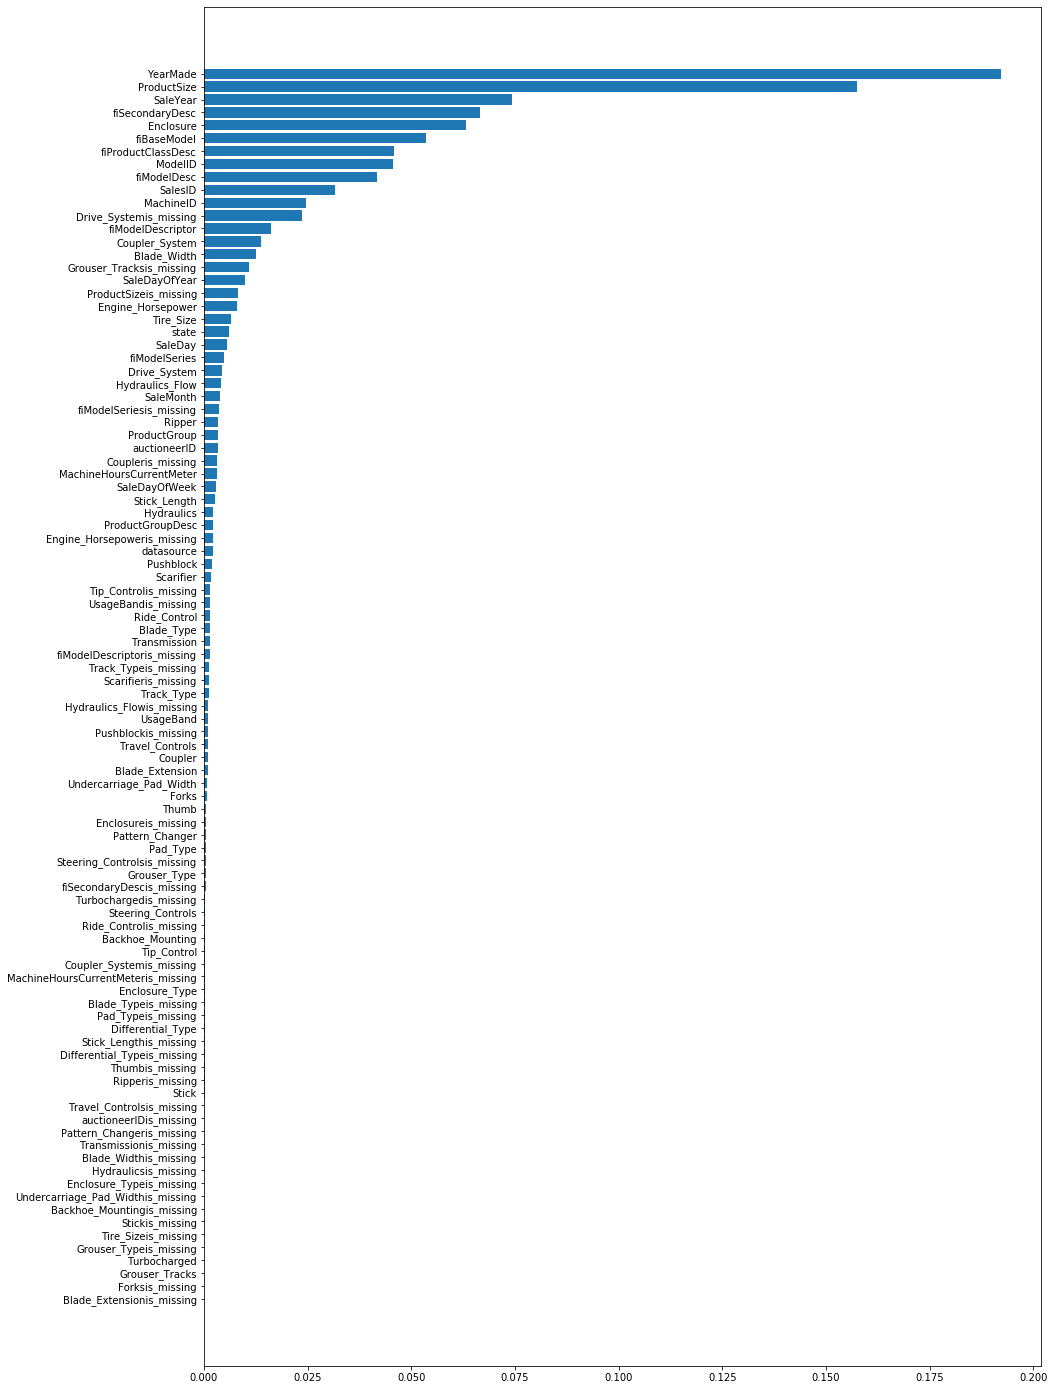

In [180]:
fig,ax=plt.subplots(figsize=(15,25))

imf=(pd.DataFrame({"features":DF_test.columns,
                   "Ideal_importance":ideal_model.feature_importances_})
                    .sort_values("Ideal_importance",ascending=True).reset_index(drop=True))
ax.barh(imf["features"],imf["Ideal_importance"]);

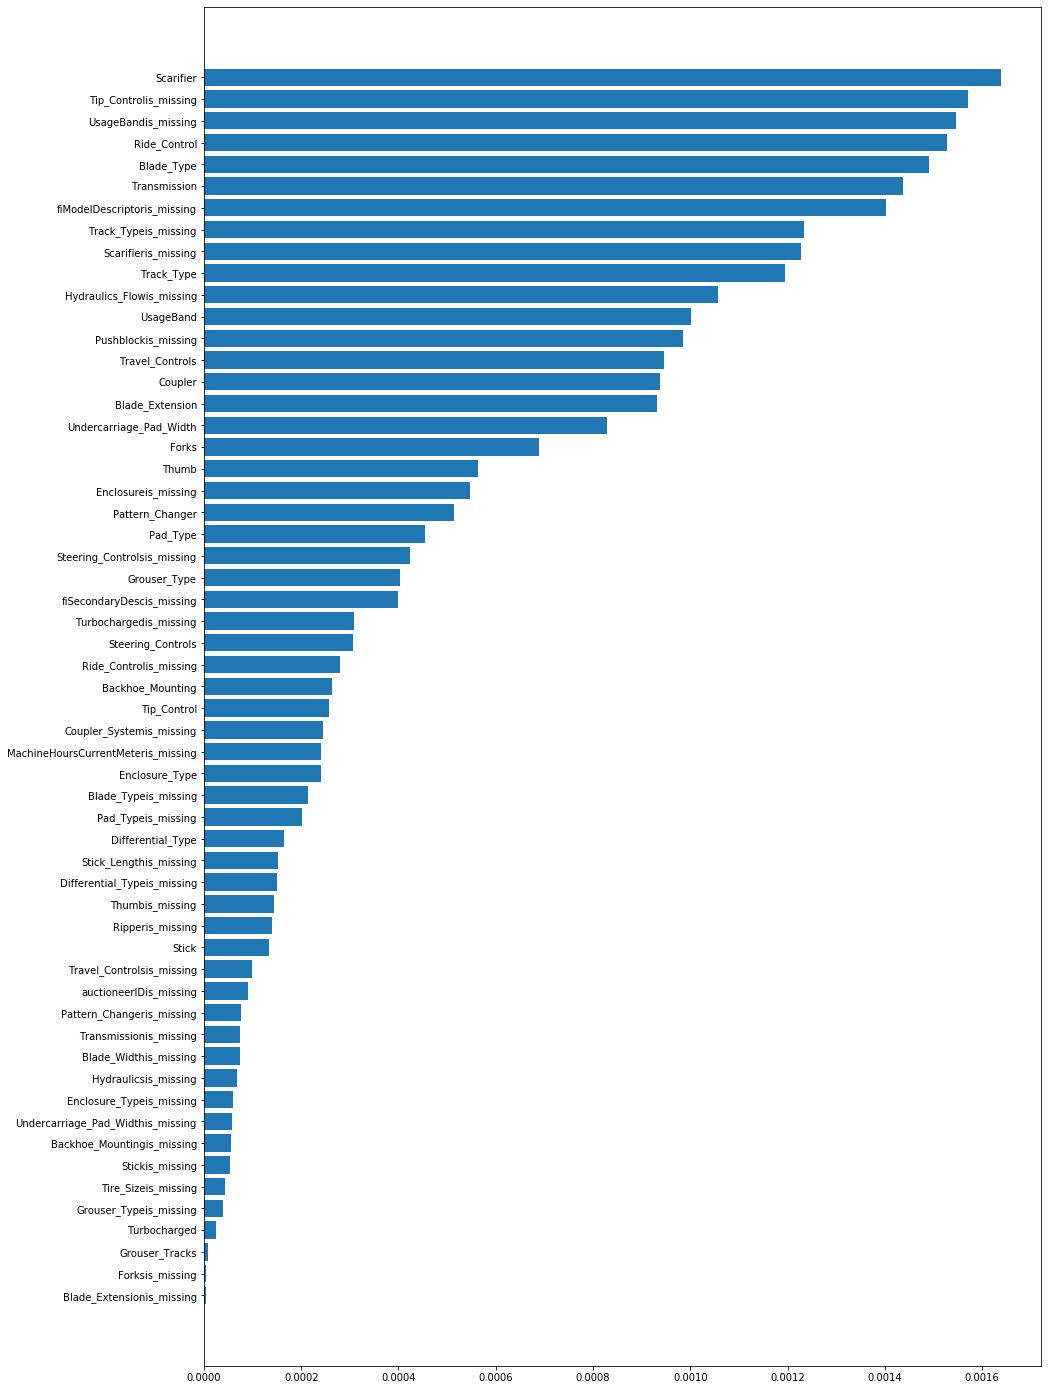

In [181]:
fig,ax=plt.subplots(figsize=(15,25))

imf=(pd.DataFrame({"features":DF_test.columns,
                   "Ideal_importance":ideal_model.feature_importances_})
                    .sort_values("Ideal_importance",ascending=True).reset_index(drop=True))
ax.barh(imf["features"][:57],imf["Ideal_importance"][:57]);